# Linear Regression from scratch
* We'll implement a linear regression model from scratch
* It will use a defined learning rate and gradient descent to update the
values on each iteration

In [1]:
import numpy as np
import pandas as pd

def compute_prediction(X, weights):
    """
    Compute the prediction y_hat based on the current weights
    @param X: dataframe, the features of our dataset
    @param weights: float, a multiplier vector that tries to minimize the MSE
     between the real target value and the predicted value
    @return: float, the predictions based on our current weights
    """
    # We use the dot product X.w
    predictions = np.dot(X, weights)
    return predictions

def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    The function updating the weight, w, with one step in a gradient descent
    manner

    @param X_train: dataframe: The training features
    @param y_train: dataframe: The target values
    @param weights: float, a multiplier vector that tries to minimize the MSE
     between the real target value and the predicted value
    @param learning_rate: The learning rate, usually very small, it will
    provide a changing value for weights on each iteration
    @return: updated weights
    """

    # We call the function to compute the current predicted values
    predictions = compute_prediction(X_train, weights)
    # The derivate of our weights
    weights_delta = np.dot(X_train.T, y_train - predictions)
    # The number of training examples. The purpose of m in this code is to normalize the weight update step during gradient descent.
    m = y_train.shape[0]
    # Updating weights.
    weights += learning_rate / float(m) * weights_delta
    return weights

def compute_cost(X, y, weights):
    """
     the function that calculates the cost J(w)
    @param X: dataframe: The feature vector X.
    @param y: dataframe: The target values
    @param weights: The current weights for our model.
    @return: float: the cost (Mean Squared Error)
    """
    # Predicting with the current weights
    predictions = compute_prediction(X, weights)
    # The cost is the mean squared error of the predicted values - the actual
    # target value
    cost = np.mean((predictions - y) ** 2 / 2.0)

    return cost




## Step 2: Putting it all together in a main iterative function:
Now, put all functions together with a model training function by performing the following tasks:

Update the weight vector in each iteration
Print out the current cost for every 100 (or it can be any number) iterations to ensure cost is decreasing and things are on the right track

In [2]:
def train_linear_regresion(X_train, y_train, max_iter, learning_rate,
                           fit_interceot = False):
    """
    Train a linear regression model with gradient descent, and return the
    trained model
    @param X_train: dataframe, the train feature vector
    @param y_Train: dataframe, the train target values
    @param max_iter: int, the maximum number of iterations, it's a stopping
    condition
    @param learning_rate: float, the learning change rate we'll use to update
     the weights
    @param fit_interceot: flaot, the initial bias (False by default)
    @return: dataframe, weights: The updated final weights that we'll use to
    make predictions
    """
    if fit_interceot:
        # If the bias exists, we need to add one more value to each sample
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    # Our starting weights are initialized as 0s
    weights = np.zeros(X_train.shape[1])

    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # Check out the cost for every 100 iterations
        if iteration % 100 == 0:
            print(f"The current loss: {compute_cost(X_train, y_train, weights)}")

    return weights

def predict(X, weights):
    """
    predict the results of new input values using the trained model
    @param X: dataframe: Features
    @param weights: dataframe: current weights
    @return: dataframe or array: Predicted values based on the model
    """
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

In [3]:
# Testing the functions:
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])
y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])

# Training a model with 1000 iterationons and a learning rate of 0.01
weights = train_linear_regresion(X_train, y_train, max_iter = 1000,
                                 learning_rate = 0.01)

The current loss: 5.680896928000001
The current loss: 0.07367346938775511
The current loss: 0.07367346938775512
The current loss: 0.07367346938775512
The current loss: 0.07367346938775512
The current loss: 0.07367346938775512
The current loss: 0.07367346938775512
The current loss: 0.07367346938775512
The current loss: 0.07367346938775512
The current loss: 0.07367346938775512


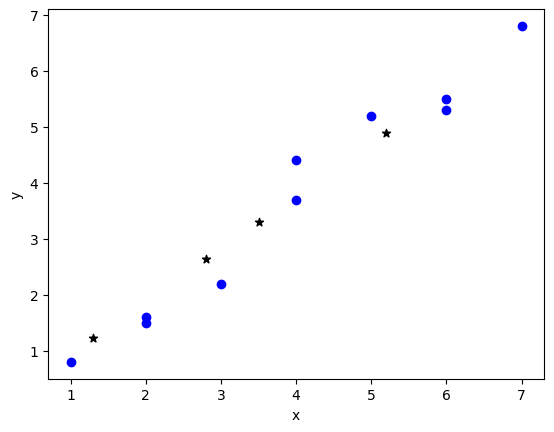

In [4]:
# Checking the model's performance on new samples
import matplotlib.pyplot as plt
X_test = np.array([[1.3], [3.5], [5.2], [2.8]])
predictions = predict(X_test, weights)

# Plotting both the train values and the new predicted values
plt.scatter(X_train[:, 0], y_train, marker = "o", c = "b")
plt.scatter(X_test[:, 0], predictions, marker = "*", c = "k")

plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Step 3: Trying our model on the diabetes dataset from scikit-learn


In [5]:
# Importing the dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

(442, 10)


In [6]:
# We'll only get 30 samples for testing
test_samples = 30

# Declaring the training data
X_train_diabetes = diabetes.data[:-test_samples, :]
y_train_diabetes = diabetes.target[:-test_samples]

In [7]:
# Train a linear regression model with 5000 iterations, at a learning rate of
# 1
weights = train_linear_regresion(X_train_diabetes, y_train_diabetes, max_iter
= 5000, learning_rate = 1, fit_interceot = True)




The current loss: 2960.123025607216
The current loss: 1984.748663254882
The current loss: 1729.7769635921989
The current loss: 1627.6348119343263
The current loss: 1572.763273052353
The current loss: 1539.554802043756
The current loss: 1518.6181097259152
The current loss: 1505.1916919461312
The current loss: 1496.4882691586809
The current loss: 1490.7927148484966
The current loss: 1487.0293572901583
The current loss: 1484.516650020924
The current loss: 1482.8194344074193
The current loss: 1481.6579404201677
The current loss: 1480.8510951067901
The current loss: 1480.280921685538
The current loss: 1479.870031213809
The current loss: 1479.5673033510566
The current loss: 1479.3387231207394
The current loss: 1479.1614836837496
The current loss: 1479.0201696937393
The current loss: 1478.9042732451073
The current loss: 1478.8065678119995
The current loss: 1478.7220374658161
The current loss: 1478.6471673310045
The current loss: 1478.57947029736
The current loss: 1478.5171691036435
The curren

In [14]:
# Making predictions:
X_test_diabetes = diabetes.data[-test_samples:, :]
y_test_diabetes = diabetes.target[-test_samples:]
predictions  = predict(X_test_diabetes, weights)

print(f"Our predicted values\n: {predictions}")

print(f"The real target values\n: {y_test_diabetes}")

Our predicted values
: [232.22192119 123.87532386 166.12297497 170.23855082 228.12523411
 154.9570854  101.09011561  87.33479691 143.68827095 190.29424697
 198.00696804 149.63068784 169.56215468 109.01832867 161.97943375
 133.00757288 260.18431805 101.52516612 115.76691141 120.73229914
 219.62761982  62.21080727 136.29855757 122.27895603  55.14532638
 191.50289376 105.68864904 126.26137526 208.99754096  47.66481183]
The real target values
: [261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111. 152.
 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104. 132.
 220.  57.]
